In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
vstable = pd.read_csv("video_store.csv", index_col=0)

vstable.shape

(40, 6)

In [3]:
vstable.head(10)

,Gender,Income,Age,Rentals,AvgPerVisit,Genre
ID,,,,,,
1,M,45000,25,27,2.5,Action
2,F,54000,33,12,3.4,Drama
3,F,32000,20,42,1.6,Comedy
4,F,59000,70,16,4.2,Drama
5,M,37000,35,25,3.2,Action
6,M,18000,20,33,1.7,Action
7,F,29000,45,19,3.8,Drama
8,M,74000,25,31,2.4,Action
9,M,38000,21,18,2.1,Comedy


In [4]:
vstable.columns

Index(['Gender', 'Income', 'Age', 'Rentals', 'AvgPerVisit', 'Genre'], dtype='object')

In [5]:
vstable.dtypes

Gender          object
Income           int64
Age              int64
Rentals          int64
AvgPerVisit    float64
Genre           object
dtype: object

#### Now we can convert columns to the appropriate type as necessary:

In [6]:
vstable["Income"] = vstable["Income"].astype(float)
vstable.dtypes

Gender          object
Income         float64
Age              int64
Rentals          int64
AvgPerVisit    float64
Genre           object
dtype: object

In [7]:
vstable.describe()

,Income,Age,Rentals,AvgPerVisit
count,40.000000,40.000000,40.000000,40.000000
mean,41500.000000,31.500000,26.175000,2.792500
std,22925.744123,12.752074,9.594035,0.833401
min,1000.000000,15.000000,11.000000,1.200000
25%,24750.000000,21.000000,19.000000,2.200000
50%,41000.000000,30.000000,25.000000,2.800000
75%,57500.000000,36.500000,32.250000,3.325000
max,89000.000000,70.000000,48.000000,4.600000


In [8]:
min_sal = vstable["Income"].min()
max_sal = vstable["Income"].max()
print (min_sal, max_sal)

1000.0 89000.0


In [9]:
vstable.describe(include="all")

,Gender,Income,Age,Rentals,AvgPerVisit,Genre
count,40,40.000000,40.000000,40.000000,40.000000,40
unique,2,NaN,NaN,NaN,NaN,3
top,M,NaN,NaN,NaN,NaN,Action
freq,21,NaN,NaN,NaN,NaN,15
mean,NaN,41500.000000,31.500000,26.175000,2.792500,NaN
std,NaN,22925.744123,12.752074,9.594035,0.833401,NaN
min,NaN,1000.000000,15.000000,11.000000,1.200000,NaN
25%,NaN,24750.000000,21.000000,19.000000,2.200000,NaN
50%,NaN,41000.000000,30.000000,25.000000,2.800000,NaN
75%,NaN,57500.000000,36.500000,32.250000,3.325000,NaN


#### We can perform data transformations such as normalization by directly applying the operation to the Pandas Series:

In [10]:
norm_sal = (vstable["Income"] - min_sal) / (max_sal-min_sal)
print (norm_sal.head(10))

ID
1     0.500000
2     0.602273
3     0.352273
4     0.659091
5     0.409091
6     0.193182
7     0.318182
8     0.829545
9     0.420455
10    0.727273
Name: Income, dtype: float64


#### Z-Score Standardization on Age

In [11]:
age_z = (vstable["Age"] - vstable["Age"].mean()) / vstable["Age"].std()
age_z.head(5)

ID
1   -0.509721
2    0.117628
3   -0.901814
4    3.019117
5    0.274465
Name: Age, dtype: float64

In [14]:
vstable["Age-Std"] = age_z
vstable.head()

,Gender,Income,Age,Rentals,AvgPerVisit,Genre,Age-Std
ID,,,,,,,
1,M,45000.0,25,27,2.5,Action,-0.509721
2,F,54000.0,33,12,3.4,Drama,0.117628
3,F,32000.0,20,42,1.6,Comedy,-0.901814
4,F,59000.0,70,16,4.2,Drama,3.019117
5,M,37000.0,35,25,3.2,Action,0.274465


In [12]:
inc_bins = pd.qcut(vstable.Income, 3)
inc_bins.head(10)

ID
1     (29000.0, 49000.0]
2     (49000.0, 89000.0]
3     (29000.0, 49000.0]
4     (49000.0, 89000.0]
5     (29000.0, 49000.0]
6     (999.999, 29000.0]
7     (999.999, 29000.0]
8     (49000.0, 89000.0]
9     (29000.0, 49000.0]
10    (49000.0, 89000.0]
Name: Income, dtype: category
Categories (3, interval[float64]): [(999.999, 29000.0] < (29000.0, 49000.0] < (49000.0, 89000.0]]

In [13]:
inc_bins = pd.qcut(vstable.Income, [0, .33, .66, 1], labels=["low", "mid", "high"])
inc_bins

ID
1      mid
2     high
3      mid
4     high
5      mid
6      low
7      low
8     high
9      mid
10    high
11     mid
12     low
13    high
14     mid
15    high
16     low
17     mid
18     low
19     low
20     low
21     mid
22     low
23     low
24    high
25     low
26    high
27    high
28    high
29     low
30     mid
31    high
32     mid
33     low
34     low
35    high
36     low
37    high
38     mid
39    high
40     low
Name: Income, dtype: category
Categories (3, object): ['low' < 'mid' < 'high']

In [15]:
vs2 = pd.concat([vstable,inc_bins], axis=1)
vs2

,Gender,Income,Age,Rentals,AvgPerVisit,Genre,Income
ID,,,,,,,
1,M,45000.0,25,27,2.5,Action,mid
2,F,54000.0,33,12,3.4,Drama,high
3,F,32000.0,20,42,1.6,Comedy,mid
4,F,59000.0,70,16,4.2,Drama,high
5,M,37000.0,35,25,3.2,Action,mid
6,M,18000.0,20,33,1.7,Action,low
7,F,29000.0,45,19,3.8,Drama,low
8,M,74000.0,25,31,2.4,Action,high
9,M,38000.0,21,18,2.1,Comedy,mid


In [16]:
vstable["inc-bins"] = inc_bins
vstable

,Gender,Income,Age,Rentals,AvgPerVisit,Genre,inc-bins
ID,,,,,,,
1,M,45000.0,25,27,2.5,Action,mid
2,F,54000.0,33,12,3.4,Drama,high
3,F,32000.0,20,42,1.6,Comedy,mid
4,F,59000.0,70,16,4.2,Drama,high
5,M,37000.0,35,25,3.2,Action,mid
6,M,18000.0,20,33,1.7,Action,low
7,F,29000.0,45,19,3.8,Drama,low
8,M,74000.0,25,31,2.4,Action,high
9,M,38000.0,21,18,2.1,Comedy,mid


In [17]:
vs_numeric = vstable[["Age","Income","Rentals","AvgPerVisit"]]
vs_num_std = (vs_numeric - vs_numeric.mean()) / vs_numeric.std()
vs_num_std.head(10)

,Age,Income,Rentals,AvgPerVisit
ID,,,,
1,-0.509721,0.152667,0.085991,-0.350971
2,0.117628,0.545239,-1.477480,0.728941
3,-0.901814,-0.414381,1.649462,-1.430883
4,3.019117,0.763334,-1.060555,1.688862
5,0.274465,-0.196286,-0.122472,0.488960
6,-0.901814,-1.025049,0.711379,-1.310893
7,1.058651,-0.545239,-0.747860,1.208901
8,-0.509721,1.417620,0.502917,-0.470962
9,-0.823395,-0.152667,-0.852092,-0.830932


In [18]:
zscore = lambda x: (x - x.mean()) / x.std()
vs_num_std = vs_numeric.apply(zscore)
vs_num_std.head()

,Age,Income,Rentals,AvgPerVisit
ID,,,,
1,-0.509721,0.152667,0.085991,-0.350971
2,0.117628,0.545239,-1.477480,0.728941
3,-0.901814,-0.414381,1.649462,-1.430883
4,3.019117,0.763334,-1.060555,1.688862
5,0.274465,-0.196286,-0.122472,0.488960


In [19]:
zscore = lambda x: ((x - x.mean()) / x.std()) if (x.dtypes==np.float64 or x.dtypes==np.int64) else x
vs_std = vstable.copy()
vs_std.apply(zscore).head()

,Gender,Income,Age,Rentals,AvgPerVisit,Genre,inc-bins
ID,,,,,,,
1,M,0.152667,-0.509721,0.085991,-0.350971,Action,mid
2,F,0.545239,0.117628,-1.477480,0.728941,Drama,high
3,F,-0.414381,-0.901814,1.649462,-1.430883,Comedy,mid
4,F,0.763334,3.019117,-1.060555,1.688862,Drama,high
5,M,-0.196286,0.274465,-0.122472,0.488960,Action,mid


In [20]:
vstable.groupby("Gender").mean()

,Income,Age,Rentals,AvgPerVisit
Gender,,,,
F,40631.578947,33.631579,27.684211,2.968421
M,42285.714286,29.571429,24.809524,2.633333


In [21]:
vstable.groupby("Genre").mean()

,Income,Age,Rentals,AvgPerVisit
Genre,,,,
Action,32666.666667,24.066667,29.933333,2.466667
Comedy,45000.000000,31.916667,25.666667,2.641667
Drama,48461.538462,39.692308,22.307692,3.307692


In [22]:
vstable.groupby("Genre").describe()

Income                                                                  \
        count          mean           std      min      25%      50%      75%   
Genre                                                                           
Action   15.0  32666.666667  21562.754484   6000.0  17000.0  26000.0  43000.0   
Comedy   12.0  45000.000000  29073.574381   1000.0  27750.0  43500.0  68000.0   
Drama    13.0  48461.538462  15119.608596  25000.0  41000.0  47000.0  59000.0   

                  Age             ... Rentals       AvgPerVisit            \
            max count       mean  ...     75%   max       count      mean   
Genre                             ...                                       
Action  74000.0  15.0  24.066667  ...    35.0  43.0        15.0  2.466667   
Comedy  89000.0  12.0  31.916667  ...    34.5  42.0        12.0  2.641667   
Drama   79000.0  13.0  39.692308  ...    24.0  48.0        13.0  3.307692   

                                             
             std  min    25%  50%  75%  max  
Genre                                        
Action  0.776132  1.4  1.950  2.4  2.8  4.6  
Comedy  0.967150  1.2  1.975  2.6  3.3  4.1  
Drama   0.504086  2.3  3.100  3.3  3.6  4.2  

[3 rows x 32 columns]

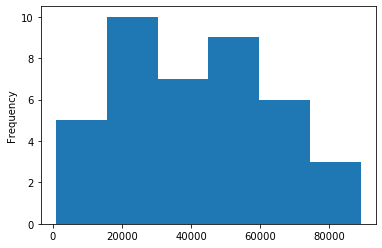

In [25]:
vstable["Income"].plot(kind="hist", bins=6)

<AxesSubplot:>

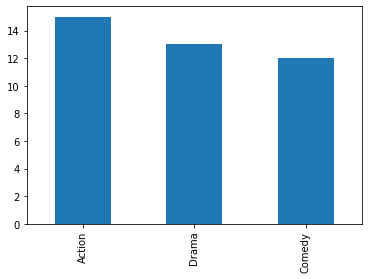

In [23]:
vstable["Genre"].value_counts().plot(kind='bar')

<AxesSubplot:title={'center':'Gender Distribution'}, xlabel='Gender', ylabel='Percentage'>

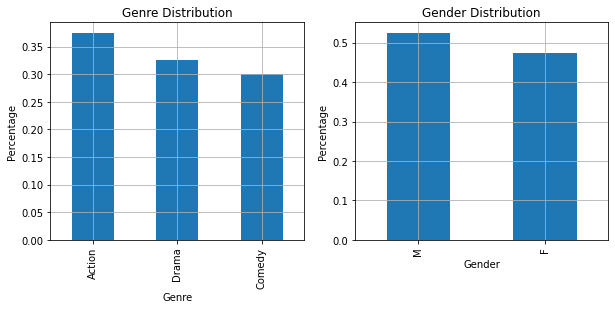

In [24]:
temp1 = vstable["Genre"].value_counts()/vstable["Genre"].count()
temp2 = vstable["Gender"].value_counts()/vstable["Gender"].count()
temp2

fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Genre')
ax1.set_ylabel('Percentage')
ax1.set_title("Genre Distribution")
temp1.plot(kind='bar', grid = True)

ax1 = fig.add_subplot(122)
ax1.set_xlabel('Gender')
ax1.set_ylabel('Percentage')
ax1.set_title("Gender Distribution")
temp2.plot(kind='bar', grid = True)


<AxesSubplot:xlabel='Income', ylabel='Age'>

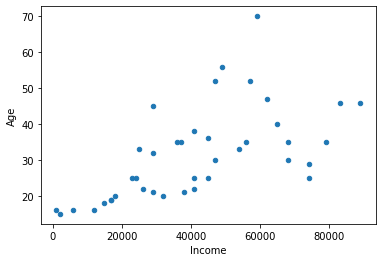

In [25]:
vstable.plot(x="Income", y="Age", kind="scatter")

In [26]:
vstable.groupby(["Genre","Gender"])["Gender"].count()

Genre   Gender
Action  F          5
        M         10
Comedy  F          6
        M          6
Drama   F          8
        M          5
Name: Gender, dtype: int64

In [27]:
gg = pd.crosstab(vstable["Genre"], vstable["Gender"])
gg

Gender,F,M
Genre,,
Action,5,10
Comedy,6,6
Drama,8,5


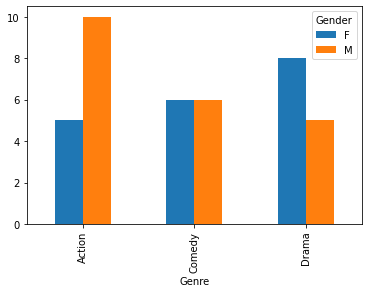

In [28]:
plt.show(gg.plot(kind="bar"))

In [29]:
gg["percent_female"] = gg["F"]/(gg["F"]+gg["M"])
gg

Gender,F,M,percent_female
Genre,,,
Action,5,10,0.333333
Comedy,6,6,0.500000
Drama,8,5,0.615385


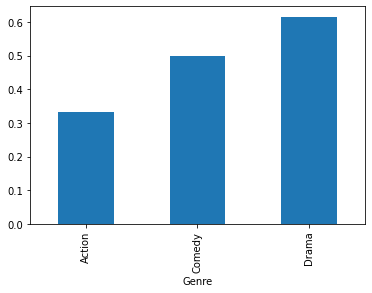

In [30]:
plt.show(gg["percent_female"].plot(kind="bar"))

#### Suppose that we would like to find all "good cutomers", i.e., those with Rentals value of >= 30:

In [31]:
good_cust = vstable[(vstable.Rentals>=30)]
#test_cust = vstable[vstable.Gender=='F']
good_cust
#test_cust


,Gender,Income,Age,Rentals,AvgPerVisit,Genre,inc-bins
ID,,,,,,,
3,F,32000.0,20,42,1.6,Comedy,mid
6,M,18000.0,20,33,1.7,Action,low
8,M,74000.0,25,31,2.4,Action,high
11,F,41000.0,22,48,2.3,Drama,mid
15,M,68000.0,30,36,2.7,Comedy,high
18,F,6000.0,16,39,1.8,Action,low
19,F,24000.0,25,41,3.1,Comedy,low
23,F,2000.0,15,30,2.5,Comedy,low
26,F,56000.0,35,40,2.6,Action,high


In [32]:
filteringDataframe = vstable[(vstable.Rentals>=30) & (vstable.Gender=='F')]
filteringDataframe


,Gender,Income,Age,Rentals,AvgPerVisit,Genre,inc-bins
ID,,,,,,,
3,F,32000.0,20,42,1.6,Comedy,mid
11,F,41000.0,22,48,2.3,Drama,mid
18,F,6000.0,16,39,1.8,Action,low
19,F,24000.0,25,41,3.1,Comedy,low
23,F,2000.0,15,30,2.5,Comedy,low
26,F,56000.0,35,40,2.6,Action,high
27,F,62000.0,47,32,3.6,Drama,high
29,F,15000.0,18,37,2.1,Action,low
36,F,29000.0,21,34,2.3,Comedy,low


In [33]:
print ("Good Customers:\n", good_cust.describe())
print ("\n All Customers:\n", vstable.describe())

Good Customers:
              Income        Age    Rentals  AvgPerVisit
count     14.000000  14.000000  14.000000    14.000000
mean   37000.000000  24.428571  37.000000     2.507143
std    25404.421178   8.599770   5.349335     0.818502
min     2000.000000  15.000000  30.000000     1.600000
25%    17250.000000  19.250000  32.250000     1.875000
50%    30500.000000  21.500000  36.500000     2.350000
75%    60500.000000  28.000000  40.750000     2.675000
max    74000.000000  47.000000  48.000000     4.600000

 All Customers:
              Income        Age    Rentals  AvgPerVisit
count     40.000000  40.000000  40.000000    40.000000
mean   41500.000000  31.500000  26.175000     2.792500
std    22925.744123  12.752074   9.594035     0.833401
min     1000.000000  15.000000  11.000000     1.200000
25%    24750.000000  21.000000  19.000000     2.200000
50%    41000.000000  30.000000  25.000000     2.800000
75%    57500.000000  36.500000  32.250000     3.325000
max    89000.000000  70.000000

#### Creating dummy variables and converting to standard spreadsheet format (all numeric attributes)

In [34]:
gender_bin = pd.get_dummies(vstable["Gender"], prefix="Gender")
gender_bin.head()

,Gender_F,Gender_M
ID,,
1,0,1
2,1,0
3,1,0
4,1,0
5,0,1


In [35]:
vs_ssf = pd.get_dummies(vstable)
vs_ssf.head(10)

,Income,Age,Rentals,AvgPerVisit,Gender_F,Gender_M,Genre_Action,Genre_Comedy,Genre_Drama,inc-bins_low,inc-bins_mid,inc-bins_high
ID,,,,,,,,,,,,
1,45000.0,25,27,2.5,0,1,1,0,0,0,1,0
2,54000.0,33,12,3.4,1,0,0,0,1,0,0,1
3,32000.0,20,42,1.6,1,0,0,1,0,0,1,0
4,59000.0,70,16,4.2,1,0,0,0,1,0,0,1
5,37000.0,35,25,3.2,0,1,1,0,0,0,1,0
6,18000.0,20,33,1.7,0,1,1,0,0,1,0,0
7,29000.0,45,19,3.8,1,0,0,0,1,1,0,0
8,74000.0,25,31,2.4,0,1,1,0,0,0,0,1
9,38000.0,21,18,2.1,0,1,0,1,0,0,1,0


In [36]:
vs_ssf.describe(include="all")

,Income,Age,Rentals,AvgPerVisit,Gender_F,Gender_M,Genre_Action,Genre_Comedy,Genre_Drama,inc-bins_low,inc-bins_mid,inc-bins_high
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.00000,40.000000,40.000000,40.00000,40.000000,40.000000
mean,41500.000000,31.500000,26.175000,2.792500,0.475000,0.525000,0.37500,0.300000,0.325000,0.37500,0.275000,0.350000
std,22925.744123,12.752074,9.594035,0.833401,0.505736,0.505736,0.49029,0.464095,0.474342,0.49029,0.452203,0.483046
min,1000.000000,15.000000,11.000000,1.200000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,24750.000000,21.000000,19.000000,2.200000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,41000.000000,30.000000,25.000000,2.800000,0.000000,1.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,57500.000000,36.500000,32.250000,3.325000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000
max,89000.000000,70.000000,48.000000,4.600000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000


In [37]:
vs_norm = (vs_ssf - vs_ssf.min()) / (vs_ssf.max()-vs_ssf.min())
vs_norm.head(10)

,Income,Age,Rentals,AvgPerVisit,Gender_F,Gender_M,Genre_Action,Genre_Comedy,Genre_Drama,inc-bins_low,inc-bins_mid,inc-bins_high
ID,,,,,,,,,,,,
1,0.500000,0.181818,0.432432,0.382353,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.602273,0.327273,0.027027,0.647059,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.352273,0.090909,0.837838,0.117647,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.659091,1.000000,0.135135,0.882353,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5,0.409091,0.363636,0.378378,0.588235,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
6,0.193182,0.090909,0.594595,0.147059,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
7,0.318182,0.545455,0.216216,0.764706,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
8,0.829545,0.181818,0.540541,0.352941,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
9,0.420455,0.109091,0.189189,0.264706,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [38]:
vs_ssf.corr()

,Income,Age,Rentals,AvgPerVisit,Gender_F,Gender_M,Genre_Action,Genre_Comedy,Genre_Drama,inc-bins_low,inc-bins_mid,inc-bins_high
Income,1.000000,0.613769,-0.262472,0.468565,-0.036490,0.036490,-0.302256,0.101217,0.213388,-0.797271,-0.016077,0.824278
Age,0.613769,1.000000,-0.547113,0.629107,0.161022,-0.161022,-0.457274,0.021663,0.451453,-0.535195,-0.033349,0.574441
Rentals,-0.262472,-0.547113,1.000000,-0.206353,0.151535,-0.151535,0.307303,-0.035128,-0.283266,0.209184,-0.040928,-0.174007
AvgPerVisit,0.468565,0.629107,-0.206353,1.000000,0.203343,-0.203343,-0.306701,-0.119992,0.434413,-0.350627,-0.130462,0.478017
Gender_F,-0.036490,0.161022,0.151535,0.203343,1.000000,-1.000000,-0.219744,0.032774,0.195067,0.090483,-0.249464,0.141696
Gender_M,0.036490,-0.161022,-0.151535,-0.203343,-1.000000,1.000000,0.219744,-0.032774,-0.195067,-0.090483,0.249464,-0.141696
Genre_Action,-0.302256,-0.457274,0.307303,-0.306701,-0.219744,0.219744,1.000000,-0.507093,-0.537484,0.360000,-0.130107,-0.243599
Genre_Comedy,0.101217,0.021663,-0.035128,-0.119992,0.032774,-0.032774,-0.507093,1.000000,-0.454257,-0.056344,-0.158832,0.205879
Genre_Drama,0.213388,0.451453,-0.283266,0.434413,0.195067,-0.195067,-0.537484,-0.454257,1.000000,-0.316978,0.289883,0.050358
inc-bins_low,-0.797271,-0.535195,0.209184,-0.350627,0.090483,-0.090483,0.360000,-0.056344,-0.316978,1.000000,-0.477060,-0.568399


#### The new table can be written into a file using to_csv method:

In [43]:
vs_norm.to_csv("../data/video_store_Numeric.csv", float_format="%1.2f")